In [1]:
import scipy
import numpy as np
import pandas as pd
from helpers.iaml_cw2_helpers import *
from matplotlib import pyplot as plt

In [2]:
X, Y = load_Q1_dataset ()
print ( 'X: ' , X. shape , 'Y: ' , Y. shape )
Xtrn = X[100: , : ] ; Ytrn = Y[100 : ] # t r a i n i n g data set
Xtst = X[ 0 : 100 , : ] ; Ytst = Y[ 0 : 100 ] # t e s t data set

X:  (800, 9) Y:  (800,)


#  iaml212cw2_q1_1():

In [3]:
Xa,Xb=[],[]
zero_y = np.where(Ytrn == 0)[0]
one_y = np.where(Ytrn ==1)[0]
for i in zero_y:
    Xa.append(Xtrn[i])
for j in one_y:
    Xb.append(Xtrn[j])
Xa,Xb= np.array(Xa),np.array(Xb)

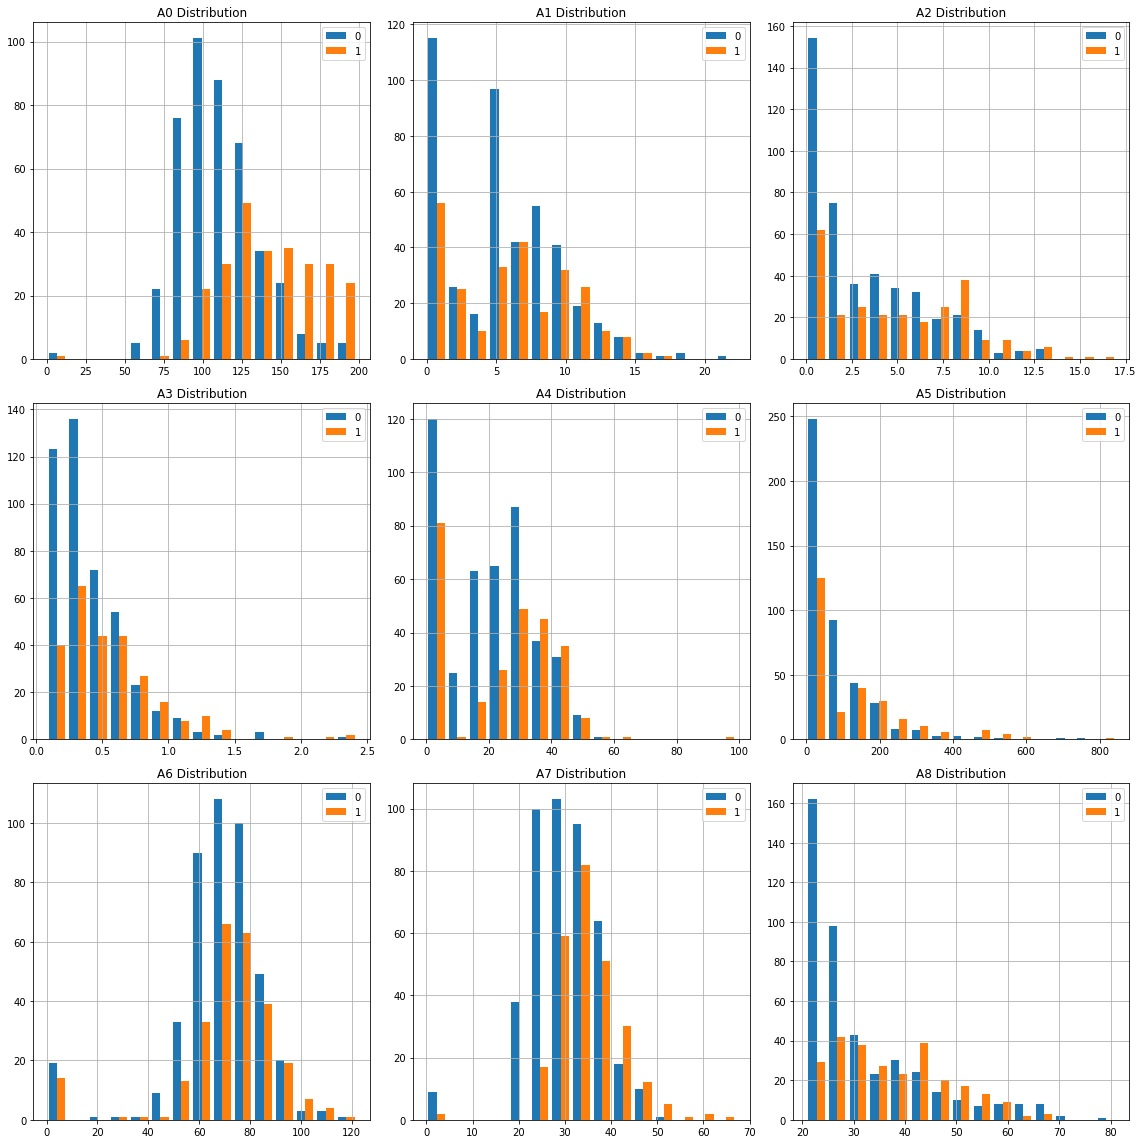

In [4]:
n_bins = 15
fig, axs = plt.subplots(3, 3, tight_layout=True,figsize=(16,16))
for i,ax in enumerate(axs.flatten()):
    ax.hist([Xa[:,i] , Xb[:,i]], bins=n_bins, label=[0,1])
    ax.grid()
    ax.set_title("A{} Distribution".format(i))
    ax.legend()
#plt.savefig("q1_1.pdf")
plt.show()

# iaml212cw2_q1_2():

In [5]:
c = np.corrcoef(Xtrn[:,0],Ytrn[:])
print(c)

[[1.        0.4911759]
 [0.4911759 1.       ]]


In [7]:
data = pd.read_csv("data/dataset_q1.csv")
c1 = data.corr(method = "spearman")# used between numeric and categorical
#print(c1)

In [8]:
c1["Y"].drop("Y")

A0    0.490163
A1    0.115959
A2    0.220435
A3    0.191281
A4    0.130871
A5    0.122183
A6    0.152870
A7    0.311938
A8    0.328686
Name: Y, dtype: float64

In [9]:
c2 = data.corr(method = "pearson")# used between numeric and numeric
#print(c2)
print(c2["Y"].drop("Y"))

A0    0.476970
A1    0.080834
A2    0.239554
A3    0.182509
A4    0.111919
A5    0.177594
A6    0.080061
A7    0.296977
A8    0.256368
Name: Y, dtype: float64


# iaml212cw2_q1_4():

In [7]:
import statistics as st

In [8]:
var_list=[]
for i in range(0,9):
    var_list.append(st.variance(Xtrn[:,i]))
x = ["A{}".format(i) for i in range(0,9)]
d = dict(zip(x,var_list))
print(d)
sort_d = sorted(d.items(), key=lambda x: (-x[1], x[0]))

{'A0': 1006.4338305628448, 'A1': 16.72342727243, 'A2': 11.595970953402821, 'A3': 0.10591536868996525, 'A4': 254.10504248600043, 'A5': 14769.0983163317, 'A6': 384.44170235111386, 'A7': 63.50469851134273, 'A8': 139.6276958847333}


In [9]:
var_list.sort()
print("sum of variances = ",sum(var_list))
l1,l2=[],[]
for i in sort_d:
    l1.append(i[0])
    l2.append(i[1])
l3=list(range(1,10))
l4=[]
c_sum=[]
for i in l3:
    l4.append(sum(l2[:i])/sum(l2))
    c_sum.append(sum(l2[:i]))
print(l4)

sum of variances =  16645.636599722257
[0.887265454093725, 0.9477277755275377, 0.9708234198453722, 0.9860889845453873, 0.9944772306210624, 0.9982923264349649, 0.9992969997721631, 0.9999936370490815, 1.0]


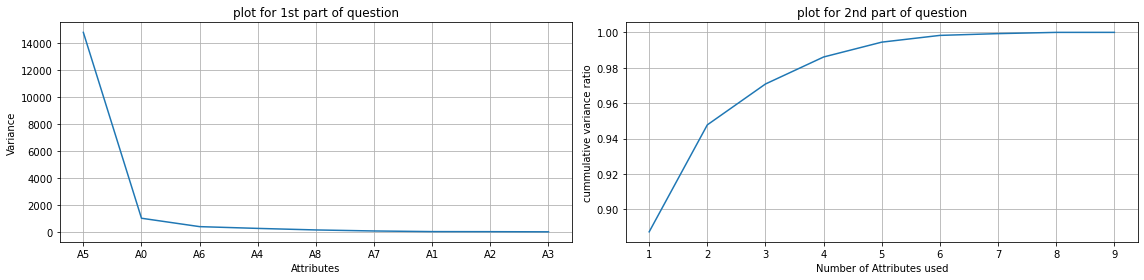

In [13]:
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(16,4))
axs[0].plot(l1,l2)
axs[0].grid()
axs[0].set_xlabel("Attributes")
axs[0].set_ylabel("Variance")
axs[0].set_title("plot for 1st part of question")
axs[1].plot(l3,l4)
axs[1].grid()
axs[1].set_xlabel("Number of Attributes used")
axs[1].set_ylabel("cummulative variance ratio")
#axs[1].set_xlim([0,9])
axs[1].set_title("plot for 2nd part of question")
plt.tight_layout()
plt.savefig("q1_4.pdf")
plt.show()

# iaml212cw2_q1_5():

In [4]:
from sklearn.decomposition import PCA
pca = PCA().fit(Xtrn)

In [15]:
print("sum of unbiased sample variance = ",sum(pca.explained_variance_))
print(pca.explained_variance_ratio_)
l51 = ["PC{}".format(i) for i in range(1,10)]
l52=[]
for i in range(1,10):
    l52.append(sum(pca.explained_variance_ratio_[:i]))
print(l52)

sum of unbiased sample variance =  16645.636599722264
[8.99347462e-01 5.40343582e-02 2.37870232e-02 1.17415453e-02
 6.84463453e-03 2.77737266e-03 9.93065305e-04 4.68599549e-04
 5.93945417e-06]
[0.8993474618422164, 0.9533818200249526, 0.977168843223706, 0.9889103885031416, 0.9957550230315232, 0.9985323956916846, 0.9995254609965464, 0.9999940605458326, 1.0]


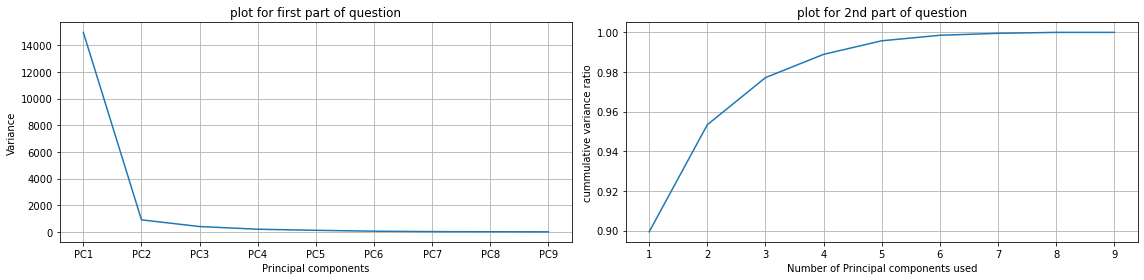

In [16]:
fig, axs = plt.subplots(1, 2, tight_layout=True,figsize=(16,4))
axs[0].plot(l51,pca.explained_variance_)
axs[0].grid()
axs[0].set_xlabel("Principal components")
axs[0].set_ylabel("Variance")
axs[0].set_title("plot for first part of question")
axs[1].plot(l3,l52)
axs[1].grid()
axs[1].set_xlabel("Number of Principal components used")
axs[1].set_ylabel("cummulative variance ratio")
axs[1].set_title("plot for 2nd part of question")
#plt.savefig("q1_5.pdf")
plt.show()

In [17]:
eigen_vectors = pca.components_[0:2]
#print(eigen_vectors[0].shape)
means_Xtrn=[]
for i in range(0,9):
    mean = Xtrn[:,i].mean()
    means_Xtrn.append(Xtrn[:,i]-mean)
X_1 = np.array(means_Xtrn).transpose()
val = np.dot(X_1,eigen_vectors.transpose())

In [19]:
print(val.shape)
print(val)
Xa1,Xb1=[],[]
zero_y = np.where(Ytrn == 0)[0]
one_y = np.where(Ytrn ==1)[0]
for i in zero_y:
    Xa1.append(val[i])
for j in one_y:
    Xb1.append(val[j])
Xa1,Xb1= np.array(Xa1),np.array(Xb1)

(700, 2)
[[-88.48961299  -0.82651381]
 [196.34286052 -52.58081499]
 [ 93.99775534   3.95616421]
 ...
 [413.44775913 -20.03871517]
 [-87.67238222  -4.75176836]
 [ 17.66472726  19.25686184]]


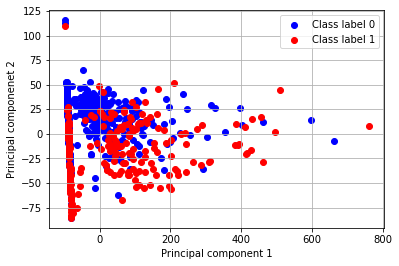

In [21]:
c1=plt.scatter(Xa1[:,0] , Xa1[:,1],color = 'blue')
c2=plt.scatter(Xb1[:,0] , Xb1[:,1],color = 'red')
plt.xlabel("Principal component 1")
plt.ylabel("Principal componenet 2")
plt.legend((c1,c2),
           ('Class label 0', 'Class label 1'),
           scatterpoints=1,
           loc=0)
plt.grid()
#plt.set_title("A{} Distribution".format(i))
plt.savefig("q1_5.pdf")
plt.show()

In [5]:
#testing using transform function
pca1 = PCA(n_components = 2).fit(Xtrn)
z= pca1.transform(Xtrn)
print(z)

[[-88.48961299  -0.82651381]
 [196.34286052 -52.58081499]
 [ 93.99775534   3.95616421]
 ...
 [413.44775913 -20.03871517]
 [-87.67238222  -4.75176836]
 [ 17.66472726  19.25686184]]


In [21]:
correlation_Xtrn_PC1 = []
correlation_Xtrn_PC2 = []
for i in range(0,9):
    correlation_Xtrn_PC1.append(np.corrcoef(Xtrn[:,i],val[:,0])[0,1])
    correlation_Xtrn_PC2.append(np.corrcoef(Xtrn[:,i],val[:,1])[0,1])

In [22]:
print(correlation_Xtrn_PC1)#look at 6th element
print(correlation_Xtrn_PC2)#look at 1st element

[0.3855930142069003, -0.04582516082225113, -0.0570515051364167, 0.18579338880949567, 0.45924021835727846, 0.9996780135176875, 0.10057182197062053, 0.23230210476652127, -0.0015740705358918503]
[-0.9142889454225337, -0.09077312003733055, -0.22546263478229112, -0.07987177012105025, 0.0971645653932255, 0.024084687085466922, -0.2553920087660299, -0.1726064402898436, -0.37344376883126895]


In [6]:
tcorrelation_Xtrn_PC1 = []
tcorrelation_Xtrn_PC2 = []
for i in range(0,9):
    tcorrelation_Xtrn_PC1.append(np.corrcoef(Xtrn[:,i],z[:,0])[0,1])
    tcorrelation_Xtrn_PC2.append(np.corrcoef(Xtrn[:,i],z[:,1])[0,1])
print(tcorrelation_Xtrn_PC1)#look at 6th element
print(tcorrelation_Xtrn_PC2)#look at 1st element

[0.38559301420690023, -0.045825160822251146, -0.0570515051364167, 0.18579338880949564, 0.45924021835727835, 0.9996780135176871, 0.10057182197062052, 0.23230210476652127, -0.0015740705358918397]
[-0.9142889454225336, -0.09077312003733055, -0.22546263478229117, -0.07987177012105025, 0.09716456539322559, 0.024084687085467113, -0.2553920087660297, -0.1726064402898435, -0.3734437688312687]


# iaml212cw2_q1_6():

In [3]:
from sklearn . preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst) 

In [4]:
from sklearn.decomposition import PCA
pcaq6 = PCA().fit(Xtrn_s)

In [5]:
print("sum of unbiased sample variance = ",sum(pcaq6.explained_variance_))
print(pcaq6.explained_variance_ratio_)
l61 = ["new_PC{}".format(i) for i in range(1,10)]
l62=[]
for i in range(1,10):
    l62.append(sum(pcaq6.explained_variance_ratio_[:i]))
print(l62)

sum of unbiased sample variance =  9.012875536480692
[0.24182043 0.1894532  0.11653636 0.11116337 0.09671205 0.08233666
 0.0729431  0.04545617 0.04357865]
[0.24182043489686034, 0.4312736346307051, 0.5478099945137069, 0.658973364578131, 0.7556854148174903, 0.8380220782949286, 0.9109651796908821, 0.9564213479387491, 0.9999999999999999]


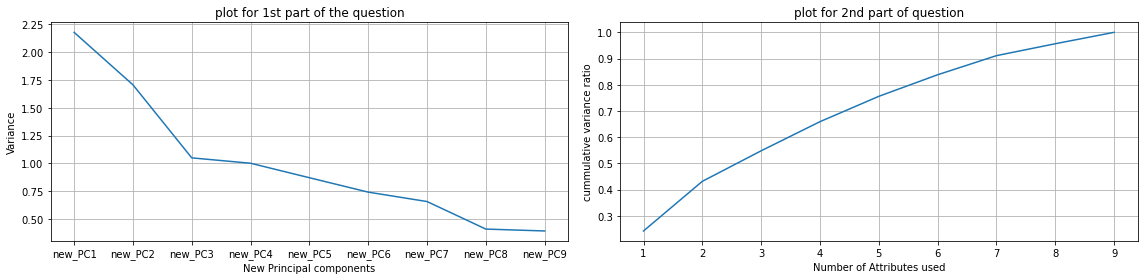

In [12]:
fig, axs = plt.subplots(1, 2,figsize=(16,4))
axs[0].plot(l61,pcaq6.explained_variance_)
axs[0].grid()
axs[0].set_xlabel("New Principal components")
axs[0].set_ylabel("Variance")
axs[0].set_title("plot for 1st part of the question")
axs[1].plot(l3,l62)
axs[1].grid()
axs[1].set_xlabel("Number of Attributes used")
axs[1].set_ylabel("cummulative variance ratio")
axs[1].set_title("plot for 2nd part of question")
fig.tight_layout()
fig.savefig("q1_6.pdf")
fig.show()

In [15]:
eigen_vectors1 = pcaq6.components_[0:2]
#print(eigen_vectors[0].shape)
means_Xtrn1=[]
for i in range(0,9):
    mean1 = Xtrn_s[:,i].mean()
    means_Xtrn1.append(Xtrn_s[:,i]-mean1)
X_11 = np.array(means_Xtrn1).transpose()
val1 = np.dot(X_11,eigen_vectors1.transpose())

In [16]:
print(val1.shape)
print(val1)
Xa11,Xb11=[],[]
zero_y = np.where(Ytrn == 0)[0]
one_y = np.where(Ytrn ==1)[0]
for i in zero_y:
    Xa11.append(val1[i])
for j in one_y:
    Xb11.append(val1[j])
Xa11,Xb11= np.array(Xa11),np.array(Xb11)

(700, 2)
[[-1.47111815e+00  1.12034934e+00]
 [ 2.10332737e+00 -1.51716117e+00]
 [-3.77942531e-01 -8.34907680e-01]
 ...
 [ 3.34667666e+00  9.64860656e-01]
 [-1.92796467e-04 -7.93335345e-02]
 [ 9.10685592e-01  1.64326590e+00]]


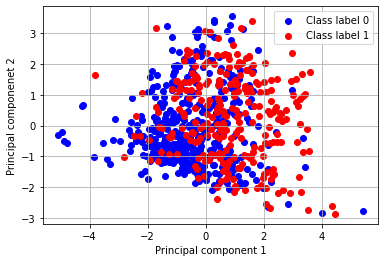

In [17]:
c11=plt.scatter(Xa11[:,0] , Xa11[:,1],color = 'blue')
c12=plt.scatter(Xb11[:,0] , Xb11[:,1],color = 'red')
plt.xlabel("Principal component 1")
plt.ylabel("Principal componenet 2")
plt.legend((c11,c12),
           ('Class label 0', 'Class label 1'),
           scatterpoints=1,
           loc=0)
plt.grid()
plt.savefig("q1_6_c.pdf")
plt.show()

In [30]:
#testing using transform function
pca2 = PCA(n_components = 2).fit(Xtrn_s)
z= pca2.transform(Xtrn_s)
print(z)

[[-1.47111815e+00  1.12034934e+00]
 [ 2.10332737e+00 -1.51716117e+00]
 [-3.77942531e-01 -8.34907680e-01]
 ...
 [ 3.34667666e+00  9.64860656e-01]
 [-1.92796467e-04 -7.93335345e-02]
 [ 9.10685592e-01  1.64326590e+00]]


In [31]:
correlation_Xtrn_s_PC1 = []
correlation_Xtrn_s_PC2 = []
for i in range(0,9):
    correlation_Xtrn_s_PC1.append(np.corrcoef(Xtrn_s[:,i],val1[:,0])[0,1])
    correlation_Xtrn_s_PC2.append(np.corrcoef(Xtrn_s[:,i],val1[:,1])[0,1])

In [32]:
print(correlation_Xtrn_s_PC1)
print(correlation_Xtrn_s_PC2)

[0.6006713897085361, 0.05729590985040144, 0.2679520322312002, 0.36565546513764274, 0.623038206106018, 0.6298568548408799, 0.5228507215944558, 0.6511607443951045, 0.3528644323802544]
[0.17743225164359921, 0.10003686429568932, 0.759982714221868, -0.20764337153009602, -0.4659904204832914, -0.36979586693725985, 0.22422808654293153, -0.1684495099450377, 0.7812491257116678]


# iaml212cw2_q1_8():

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [33]:
C = np.logspace(-2,2,13)
#print(C)

In [34]:
kf = StratifiedKFold(n_splits=5)

In [36]:
list_of_mean_acc ,list_of_std= [],[]
list_of_mean_acc1 ,list_of_std1= [],[]
for c in C:
    #print(c)
    list_acc_train , list_acc_test = [],[]
    for train_index, test_index in kf.split(Xtrn_s,Ytrn):
        X_train, X_test = Xtrn_s[train_index], Xtrn_s[test_index]
        y_train, y_test = Ytrn[train_index], Ytrn[test_index]
        #print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
        svc_q8 = SVC(C=c).fit(X_train,y_train)
        list_acc_test.append(svc_q8.score(X_test,y_test))
        list_acc_train.append(svc_q8.score(X_train,y_train))
    #print(list_acc_train,list_acc_test)
    list_of_mean_acc.append(np.mean(np.array(list_acc_train)))
    list_of_mean_acc1.append(np.mean(np.array(list_acc_test)))
    list_of_std.append(np.std(np.array(list_acc_train)))
    list_of_std1.append(np.std(np.array(list_acc_test)))

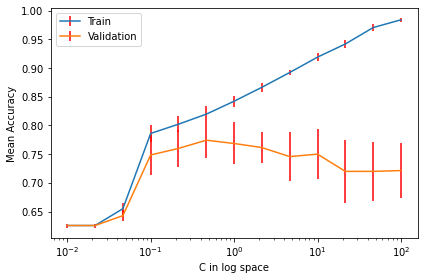

In [40]:
q81 =plt.errorbar(C, list_of_mean_acc, yerr = list_of_std, ecolor = 'red')
q82 =plt.errorbar(C, list_of_mean_acc1, yerr = list_of_std1, ecolor = 'red')
plt.xscale('log')
plt.xlabel("C in log space")
plt.ylabel("Mean Accuracy")
plt.legend((q81,q82),
           ('Train', 'Validation'),
           loc=0)
plt.tight_layout()
plt.savefig("q1_8_1.pdf")
plt.show()

In [38]:
print("maximum mean accuracy = ",max(list_of_mean_acc1)," with value of c = ",C[np.argmax(np.array(list_of_mean_acc1))])

maximum mean accuracy =  0.7742857142857142  with value of c =  0.46415888336127775


In [39]:
best_svm = SVC(C=C[np.argmax(np.array(list_of_mean_acc1))]).fit(Xtrn_s,Ytrn)
acc = best_svm.score(Xtst_s,Ytst)
print("correctly classified = ", acc*Xtst_s.shape[0])
print(Xtst_s.shape)

correctly classified =  75.0
(100, 9)


# iaml212cw2_q1_9():

In [4]:
ylabel_q9 = np.where(Ytrn == 0)[0] #samples with labels=0
x_q9 = Xtrn[:,[4,7]]
x_q9_1 = x_q9[ylabel_q9]
print(x_q9_1.shape)

(438, 2)


In [5]:
a4_greater_1 = np.where(x_q9_1[:,0] >1)[0]
Ztrn = x_q9_1[a4_greater_1]
print(Ztrn.shape)

(318, 2)


In [6]:
sample_mean = np.mean(Ztrn[:,0]),np.mean(Ztrn[:,1])

In [7]:
from scipy.stats import multivariate_normal
print(list(sample_mean))
covariance = np.cov(Ztrn.T)
print(covariance)

[27.020943396226414, 31.093207547169815]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


In [8]:
x, y = np.mgrid[0:max(Ztrn[:,0]):1, 0:max(Ztrn[:,1]):1]
pos = np.dstack((x, y))
rv = multivariate_normal(sample_mean, covariance)

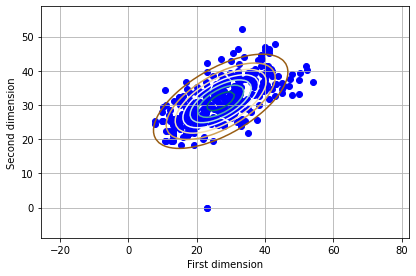

In [12]:
plt.contour(x, y, rv.pdf(pos),cmap = 'BrBG')
plt.scatter(Ztrn[:,0],Ztrn[:,1],color = 'blue')
plt.axis('equal')
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.ylim(-10,60)
plt.grid()
plt.tight_layout()
plt.savefig("q1_9.pdf")
plt.show()

# iaml212cw2_q1_10():

In [13]:
sample_mean_q10 = np.copy(sample_mean)
sample_covariance_q10 = np.copy(covariance)
sample_covariance_q10[0][1] =0
sample_covariance_q10[1][0] = 0
print(sample_covariance_q10)

[[95.14113475  0.        ]
 [ 0.         46.69341618]]


In [14]:
x, y = np.mgrid[0:max(Ztrn[:,0]):1, 0:max(Ztrn[:,1]):1]
pos = np.dstack((x, y))
rv = multivariate_normal(sample_mean_q10, sample_covariance_q10)

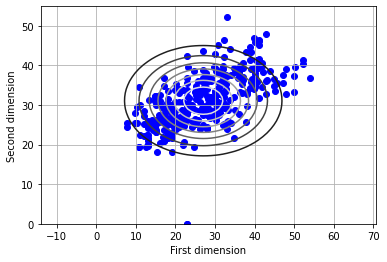

In [18]:
plt.contour(x, y, rv.pdf(pos),cmap = 'gray')
plt.scatter(Ztrn[:,0],Ztrn[:,1],color = 'blue')
plt.axis('equal')
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.grid()
plt.savefig("q1_10.pdf")
plt.show()

# iaml212cw2_q1_11():

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
lr = LogisticRegression(max_iter = 1000,random_state = 0).fit(Xtrn_s,Ytrn)

In [32]:
lr.score(Xtrn_s,Ytrn)

0.7814285714285715

In [33]:
from sklearn.model_selection import StratifiedKFold
skf_q11 = StratifiedKFold(n_splits=5)
#print(skf_q11.get_n_splits(Xtrn_s,Ytrn))
lr1 = LogisticRegression(max_iter = 1000,random_state =0)
scores = cross_val_score(lr1, Xtrn_s, Ytrn, scoring='accuracy', cv=skf_q11)

In [34]:
mean_scores = np.mean(scores)
sd_scores = np.std(scores)

In [35]:
print(mean_scores,sd_scores)

0.7714285714285716 0.04356557337707687


In [36]:
exp_scores,exp_scores_means =[],[]
for i in range(0,9):
    copy_X = np.copy(Xtrn_s)
    drop_X = np.delete(copy_X,i,axis =1)
    #print(drop_X.shape)
    exp_scores.append(cross_val_score(lr1,drop_X,Ytrn,scoring= 'accuracy',cv = skf_q11))
    exp_scores_means.append(np.mean(cross_val_score(lr1,drop_X,Ytrn,scoring= 'accuracy',cv = skf_q11)))

In [37]:
exp_scores_means# look at index value to know which attribute is dropped

[0.6914285714285714,
 0.7657142857142858,
 0.7828571428571429,
 0.7557142857142857,
 0.7742857142857144,
 0.77,
 0.7628571428571429,
 0.7557142857142857,
 0.7685714285714286]

In [38]:
exp_scores

[array([0.72142857, 0.68571429, 0.67142857, 0.65      , 0.72857143]),
 array([0.82857143, 0.75      , 0.8       , 0.69285714, 0.75714286]),
 array([0.82142857, 0.78571429, 0.81428571, 0.69285714, 0.8       ]),
 array([0.81428571, 0.75714286, 0.77142857, 0.69285714, 0.74285714]),
 array([0.83571429, 0.75714286, 0.8       , 0.72142857, 0.75714286]),
 array([0.82142857, 0.75714286, 0.8       , 0.71428571, 0.75714286]),
 array([0.80714286, 0.77142857, 0.77857143, 0.72142857, 0.73571429]),
 array([0.78571429, 0.73571429, 0.81428571, 0.68571429, 0.75714286]),
 array([0.82857143, 0.75      , 0.79285714, 0.71428571, 0.75714286])]

# Experiments

In [ ]:
lmn = [1,2,3,4,5,6]
#print(mean(lmn))
print(np.std(np.array(lmn)))
print(st.stdev(lmn))
print(st.pstdev(lmn))

In [ ]:
skf_q8 = StratifiedKFold(n_splits=5)
#skf_q8.get_n_splits(Xtrn_s,Ytrn)
s=[]
list_of_means ,list_of_std= [],[]
for c in C:
    #print(c)
    svc_q8 = SVC(C=c)
    scores = cross_val_score(svc_q8,Xtrn_s,Ytrn,scoring = 'accuracy',cv= skf_q8)
    list_of_means.append(np.mean(scores))
    list_of_std.append(np.std(scores))

In [ ]:
plt.errorbar(C, list_of_means, yerr = list_of_std, ecolor = 'red')
plt.xscale('log')
plt.xlabel("C in log space")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("q1_8.pdf")
plt.show()